<a href="https://colab.research.google.com/github/raghava7129/Titanic_MachineLearning/blob/main/Proj_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
Train=pd.read_csv('/content/drive/MyDrive/proj_train.csv')
Test=pd.read_csv('/content/drive/MyDrive/Proj_test.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Test_output.csv')

In [60]:
Train.duplicated().sum()

0

In [61]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
Train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [63]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
Test['Fare']=Test['Fare'].fillna(Test["Fare"].median())

In [66]:
Train.corr()['Survived']

<ipython-input-66-2310cff7acca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Train.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

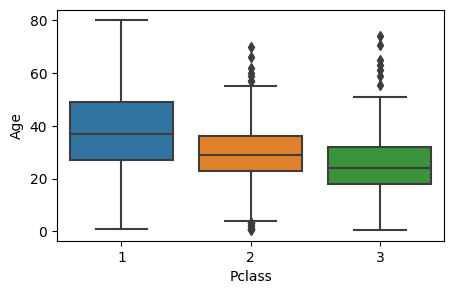

In [67]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Pclass',y='Age',data=Train)
plt.show()

In [68]:
def Set_Age(row):
  age=row[0]
  pclass=row[1]

  if(age>0):
    return age
  else:
    if(pclass == 1 ):
      return 37
    elif(pclass==2):
      return 29
    else:
      return 25

In [69]:
Train['Age']=Train[['Age','Pclass']].apply(Set_Age,axis=1)
Test['Age']=Test[['Age','Pclass']].apply(Set_Age,axis=1)

In [70]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
Train.drop('Cabin',axis=1,inplace=True)
Test.drop('Cabin',axis=1,inplace=True)

In [72]:
Train["Embarked"] = Train["Embarked"].fillna("S")
Test["Embarked"] = Test["Embarked"].fillna("S")

In [73]:
embark_test=pd.get_dummies(Test['Embarked'],prefix='emabarked')
embark_train=pd.get_dummies(Train['Embarked'],prefix='emabarked')

In [74]:
Train.drop('Embarked',axis=1,inplace=True)
Test.drop('Embarked',axis=1,inplace=True)

In [75]:
Train=Train.join(embark_train)
Test=Test.join(embark_test)

In [76]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,emabarked_C,emabarked_Q,emabarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


In [77]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
emabarked_C    0
emabarked_Q    0
emabarked_S    0
dtype: int64

In [78]:
Test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
emabarked_C    0
emabarked_Q    0
emabarked_S    0
dtype: int64

In [79]:
male_train=pd.get_dummies(Train['Sex'],drop_first=True)
male_test=pd.get_dummies(Test['Sex'],drop_first=True)

In [80]:
Train.drop(['Sex','Name','Ticket','PassengerId'],axis=1,inplace=True)
Test.drop(['Sex','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [81]:
Train=pd.concat([Train,male_train],axis=1)
Test=pd.concat([Test,male_test],axis=1)

In [82]:
Train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,emabarked_C,emabarked_Q,emabarked_S,male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


In [83]:
Train.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,emabarked_C,emabarked_Q,emabarked_S,male
657,0,3,32.0,1,1,15.5000,0,1,0,0
331,0,1,45.5,0,0,28.5000,0,0,1,1
383,1,1,35.0,1,0,52.0000,0,0,1,0
225,0,3,22.0,0,0,9.3500,0,0,1,1
645,1,1,48.0,1,0,76.7292,1,0,0,1


In [84]:
Train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,emabarked_C,emabarked_Q,emabarked_S,male
Survived,1.000000,-0.338481,-0.050633,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,-0.543351
Pclass,-0.338481,1.000000,-0.400570,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,0.131900
Age,-0.050633,-0.400570,1.000000,-0.242750,-0.173999,0.120239,0.040726,-0.071008,0.009008,0.079796
SibSp,-0.035322,0.083081,-0.242750,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,-0.114631
Parch,0.081629,0.018443,-0.173999,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,-0.245489
Fare,0.257307,-0.549500,0.120239,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,-0.182333
emabarked_C,0.168240,-0.243292,0.040726,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,-0.082853
emabarked_Q,0.003650,0.221009,-0.071008,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,-0.074115
emabarked_S,-0.149683,0.074053,0.009008,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,0.119224
male,-0.543351,0.131900,0.079796,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224,1.000000


In [85]:
Train.corr()['Survived']

Survived       1.000000
Pclass        -0.338481
Age           -0.050633
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
emabarked_C    0.168240
emabarked_Q    0.003650
emabarked_S   -0.149683
male          -0.543351
Name: Survived, dtype: float64

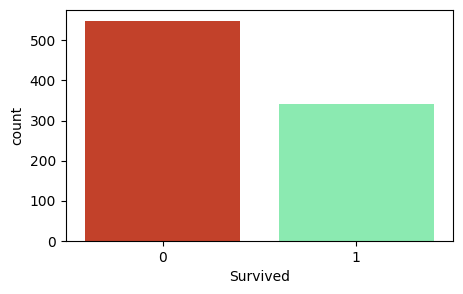

In [86]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,palette=['#db2f11',"#7bfaae"])
plt.show()

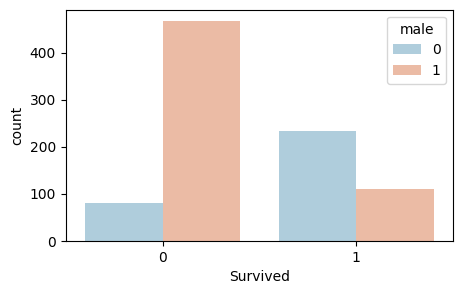

In [87]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,hue='male',palette='RdBu_r')
plt.show()

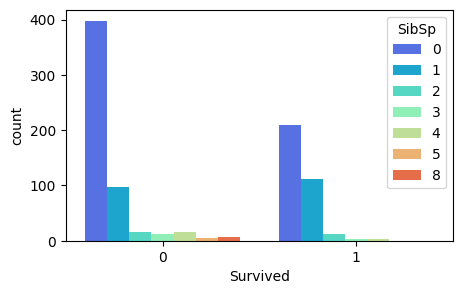

In [88]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,hue='SibSp',palette='rainbow')
plt.show()

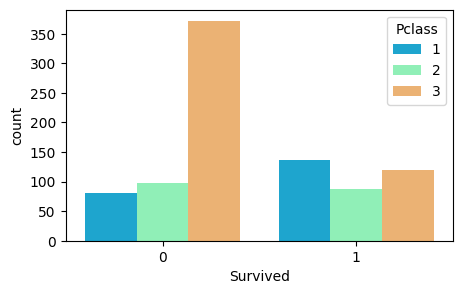

In [89]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,hue='Pclass',palette='rainbow')
plt.show()

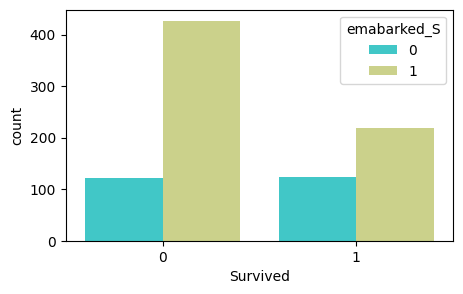

In [90]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,hue='emabarked_S',palette='rainbow')
plt.show()

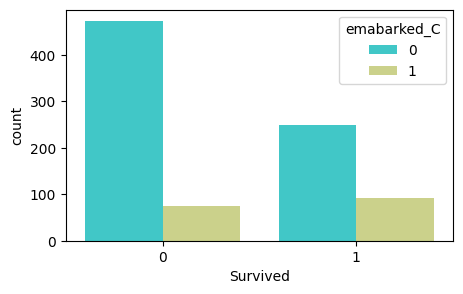

In [91]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,hue='emabarked_C',palette='rainbow')
plt.show()

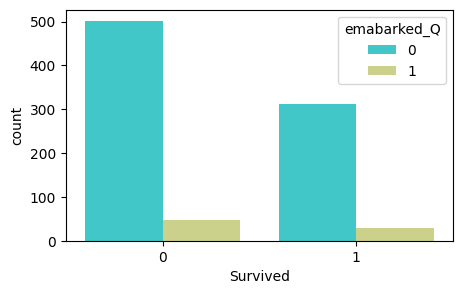

In [92]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=Train,hue='emabarked_Q',palette='rainbow')
plt.show()

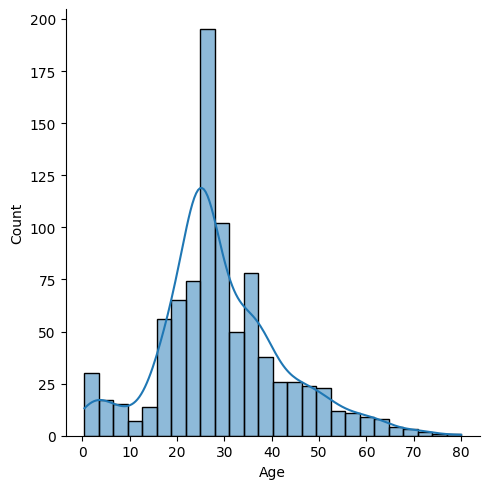

In [93]:

sns.displot(Train['Age'],kde='True')
plt.show()

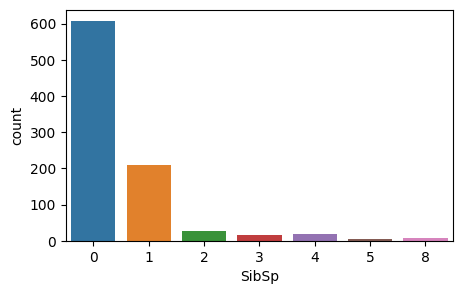

In [94]:
plt.figure(figsize=(5,3))
sns.countplot(x='SibSp',data=Train)
plt.show()

In [95]:
Train.corr()['Survived']

Survived       1.000000
Pclass        -0.338481
Age           -0.050633
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
emabarked_C    0.168240
emabarked_Q    0.003650
emabarked_S   -0.149683
male          -0.543351
Name: Survived, dtype: float64

In [96]:
Train.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,emabarked_C,emabarked_Q,emabarked_S,male
641,1,1,24.0,0,0,69.3000,1,0,0,0
735,0,3,28.5,0,0,16.1000,0,0,1,1
707,1,1,42.0,0,0,26.2875,0,0,1,1
438,0,1,64.0,1,4,263.0000,0,0,1,1
42,0,3,25.0,0,0,7.8958,1,0,0,1


In [97]:
X_train=Train.drop('Survived',axis=1)

In [98]:
X_train

,Pclass,Age,SibSp,Parch,Fare,emabarked_C,emabarked_Q,emabarked_S,male
0,3,22.0,1,0,7.2500,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0
4,3,35.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,1
887,1,19.0,0,0,30.0000,0,0,1,0
888,3,25.0,1,2,23.4500,0,0,1,0
889,1,26.0,0,0,30.0000,1,0,0,1


In [99]:
y_train=Train['Survived']

In [100]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
model.score(X_train,y_train)

0.8058361391694725

In [104]:
X_Test=Test

In [105]:
Test.head()

,Pclass,Age,SibSp,Parch,Fare,emabarked_C,emabarked_Q,emabarked_S,male
0,3,34.5,0,0,7.8292,0,1,0,1
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1
3,3,27.0,0,0,8.6625,0,0,1,1
4,3,22.0,1,1,12.2875,0,0,1,0


In [106]:
X_Test.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
emabarked_C    0
emabarked_Q    0
emabarked_S    0
male           0
dtype: int64

In [107]:
y_test.drop('PassengerId',axis=1,inplace=True)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred_train_lr = lr.predict(X_train)

In [112]:
y_pred_test_lr = lr.predict(X_Test)

In [113]:
y_pred_train_lr = [1 if i > 0.5 else 0 for i in y_pred_train_lr]
y_pred_test_lr = [1 if i > 0.5 else 0 for i in y_pred_test_lr]

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
print(f'Training Accuracy using Linear Regression: {accuracy_train_lr:.2f}')

Training Accuracy using Linear Regression: 0.80


In [116]:
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print(f'Test Accuracy using Linear Regression: {accuracy_test_lr:.2f}')

Test Accuracy using Linear Regression: 0.96


In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [118]:
y_pred_train_val = rfc.predict(X_train)

In [119]:
accuracy = accuracy_score(y_train, y_pred_train_val)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [120]:
y_pred_test_val=rfc.predict(X_Test)

In [121]:
accuracy = accuracy_score(y_test, y_pred_test_val)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
knn=KNeighborsClassifier(n_neighbors=11)

In [124]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [125]:
y_pred_train_knn = knn.predict(X_train)
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
print(f'Training Accuracy using KNN: {accuracy_train_knn:.2f}')

Training Accuracy using KNN: 0.76


In [126]:
y_pred_test_knn = knn.predict(X_Test)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print(f'Test Accuracy using KNN: {accuracy_test_knn:.2f}')

Test Accuracy using KNN: 0.66


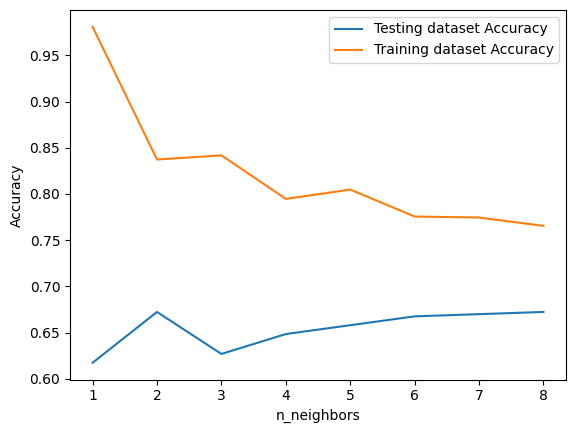

In [127]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_Test,y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt = DecisionTreeClassifier(random_state=0)

In [130]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [131]:
y_pred_train_dt = dt.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
print(f'Training Accuracy using Decision Trees: {accuracy_train_dt:.2f}')

Training Accuracy using Decision Trees: 0.98


In [132]:
y_pred_test_dt = dt.predict(X_Test)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(f'Test Accuracy using Decision Trees: {accuracy_test_dt:.2f}')

Test Accuracy using Decision Trees: 0.78
